# Preprocessing: jabref
We have focused on extracting the following:
* packages
* libraries
* classes
* methods (public)
* variables (public)
* comments

In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva

%run ../script/GatherData.py

Text(0.5, 1.0, 'Shows the number of files for every label, from JabRef')

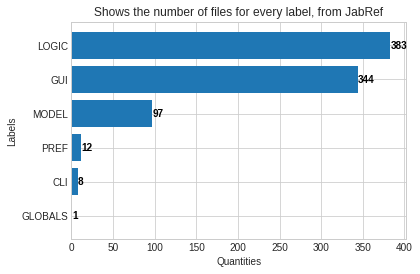

In [2]:
dataset_df = pd.read_csv(str(RP.getRawDataSet()))
y_labels = dataset_df.Label.unique()
x_quantity = [len(dataset_df.loc[dataset_df['Label']==label]) for label in y_labels]
tmp_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
tmp_df = tmp_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=tmp_df.Labels, width=tmp_df.Quantity)
for i, v in enumerate(tmp_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantities')
plt.ylabel('Labels')
plt.title('Shows the number of files for every label, from JabRef')

# Evaluation
The figure above shows the spread of the given concerns and imbalance in the dataset taken from the JabRef architecture.

### Static parts
__Train-test split,__ will be set at 10% for training, and 90% for evaluation.  
* __Metrics,__ the most relevant ones will be the following:  
   * Confusion matrix  
   * Precission  
   * Accuracy  
   * F1-score/value  
   * Average score (laoa will explain)  
    
----

### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Default, then exit preprocess: 'd'
* Clear commands: 'clear'

___

# Basic preprocessing
1. Word tokenize the whole file, removing special characters with the following regex '\\w+'.
2. Remove java keywords.
3. Separate composite words (e.g. 'getFieldNames' = 'get', 'Field', 'Names').
4. Lower case the tokens.


In [3]:
# Parse the data according to the rules above
settings = [["raw", "tow", "jk", "scw", "lc"]]
# file to save the result in
basic_file = '../Data/basic_preprocessing.csv'
basic_df = Prep.preprocess_settings(settings, basic_file)

In [4]:
basic_df = pd.read_csv(basic_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(basic_df, 'Label', ['GLOBALS', 'CLI'])

test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier , metrics = evaluate.evaluate_MaxEnt()

<AxesSubplot:title={'center':'MaxEnt Normalized Confusion-matrix Type-1 preprocessing'}>

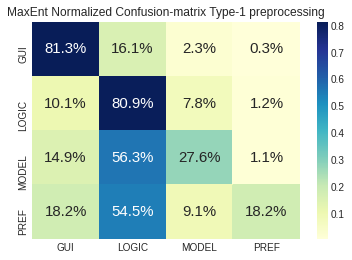

In [5]:
# Normalized confusion matrix
plt.title(metrics.name + " Normalized Confusion-matrix Type-1 preprocessing")
metrics.visualize_normalized_confusion_matrix()

<AxesSubplot:title={'center':'MaxEnt Confusion-matrix Basic preprocessing'}>

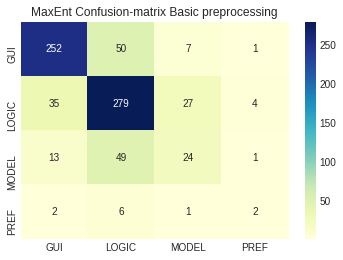

In [6]:
# confusion matrix
plt.title(metrics.name + " Confusion-matrix Basic preprocessing")
metrics.visualize_confusion_matrix()

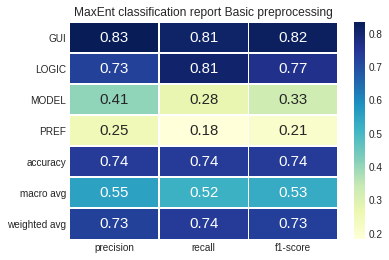

In [7]:
plt.title(metrics.name + " classification report Basic preprocessing")
metrics.plot_data_info()

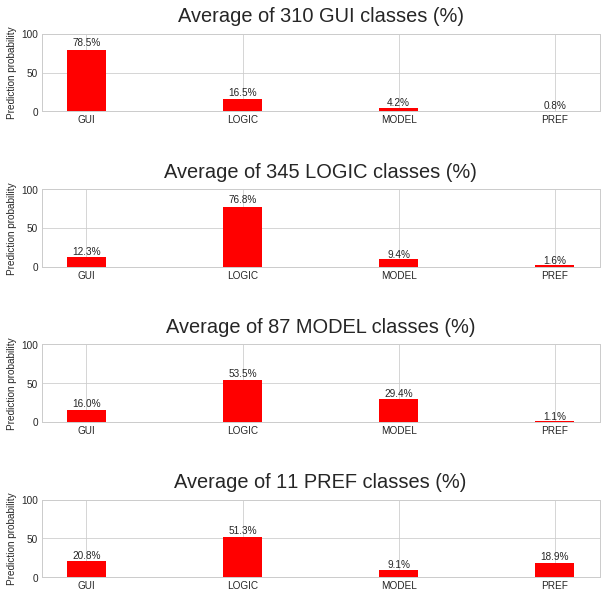

In [8]:
metrics.plot_predictionScoreAverage(classifier)

___

# Type 1 preprocessing
With the idea of separating the packages from import libraries so that they don't get grouped together, we do the following:
1. Extract packages, and parse:  
    1. Tokenize words, removing punctuations      
    2. Remove Java keywords  
2. Extract libraries:     
3. Extract public methods:  
    1. Tokenize, and separate compound words  
    2. Lower case  
    3. Remove English stopwords  

In [9]:
settings = [
    ['lib'],
    ['pm', 'scw', 'lc', 'sw'],
    ['pac', 'tow', 'jk'],
    ]
type1_file = '../Data/type1_preprocessing.csv'
Prep.preprocess_settings(settings, type1_file)

,FileName,Label,FileContent
0,GenerateCharacterTable.java,CLI,"[import java.util.Map, import java.util.TreeMa..."
1,ArgumentProcessor.java,CLI,"[import java.io.File, import java.io.IOExcepti..."
2,XMPUtilMain.java,CLI,"[import java.io.BufferedReader, import java.io..."
3,AuxCommandLine.java,CLI,[import net.sf.jabref.logic.auxparser.AuxParse...
4,ImportInspectionCommandLine.java,CLI,"[import java.util.Collection, import java.util..."
...,...,...,...
840,CustomImportList.java,PREF,"[import java.util.List, import java.util.TreeS..."
841,JabRefPreferences.java,PREF,"[import java.awt.Color, import java.awt.Font, ..."
842,PreviewPreferences.java,PREF,"[import java.util.List, preview, preferences, ..."
843,SearchPreferences.java,PREF,"[import java.util.Map, import java.util.Object..."


In [10]:
type1_df = pd.read_csv(type1_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(type1_df, 'Label', ['GLOBALS', 'CLI'])
test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier , metrics = evaluate.evaluate_MaxEnt()

<AxesSubplot:title={'center':'MaxEnt Normalized Confusion-matrix Type-1 preprocessing'}>

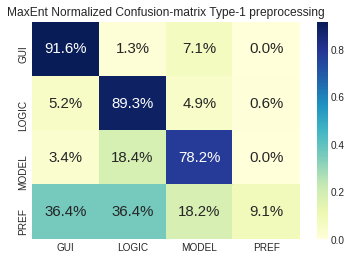

In [11]:
# Normalized confusion matrix
plt.title(metrics.name + " Normalized Confusion-matrix Type-1 preprocessing")
metrics.visualize_normalized_confusion_matrix()

<AxesSubplot:title={'center':'MaxEnt Confusion-matrix Type-1 preprocessing'}>

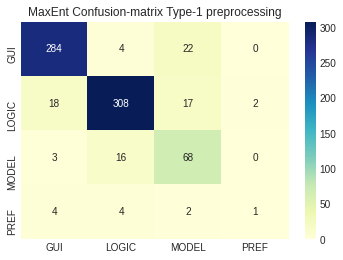

In [12]:
# Normalized confusion matrix
plt.title(metrics.name + " Confusion-matrix Type-1 preprocessing")
metrics.visualize_confusion_matrix()

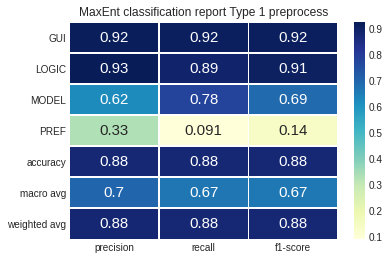

In [13]:
plt.title(metrics.name + " classification report Type 1 preprocess")
metrics.plot_data_info()

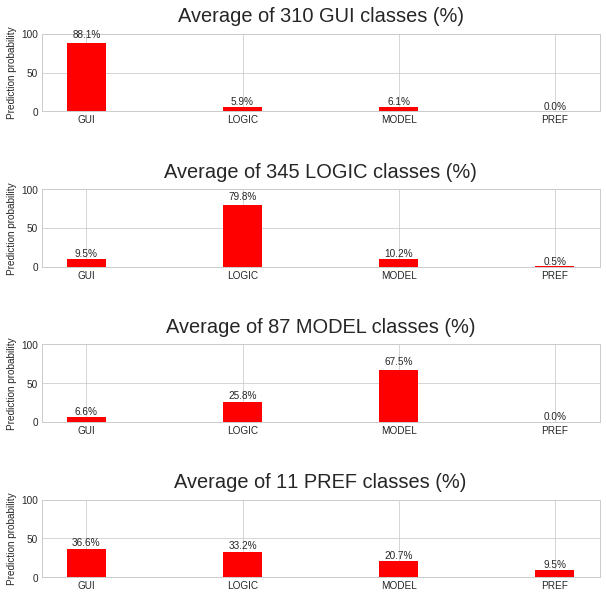

In [14]:
metrics.plot_predictionScoreAverage(classifier)

___

# Test different combowomboosss
## 10 files


### Preprocessing settings
```
settings = [
        ['extraction', 'parsing' ... ,'parsing],
        ...,
        ['extraction', 'parsing']
    ]
```
#### Extraction options
* Raw data: 'raw'
* Classes: 'c'
* Public methods: 'pm'
* Public variables/objects: 'pv'
* Import: 'lib'
* Packages: 'pac'
* Comments: 'com'
* Clear commands: 'clear'

#### Parsing options
* Lower case: 'lc'
* Remove single characters:  'sc'
* Remove stop words: 'sw'
* Remove java keywords: 'jk'
* Remove java annotations: 'ja' NOT IMPLEMENTED
* Remove java syntax ('jk','ja','sc'): 'js' NOT IMPLEMENTED
* Remove english stopwords: 'es'
* Remove numbers: 'nu'
* Separate compound words: 'scw'
* Stem words: 'stem'
* Clear commands: 'clear'

___

```
settings = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw'],
    ['pac', 'tow', 'jk', 'scw','lc', 'sw']
    ]
```

In [27]:
# maxent 
s1 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac', 'tow', 'jk'],
    ]

s2 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac',  'tow', 'jk'],
    ['com', 'tow', 'jk', 'scw', 'lc', 'sw'],
]

# Interestting results
s3 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]

s4 = [
    ['pac', 'tow', 'jk'],
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw', 'stem'],
]
s5 = [
    ['pac', 'tow', 'jk',],
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['c', 'tow', 'scw', 'jk', 'lc'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
s6 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
test_file = '../Data/test.csv'
df = Prep.preprocess_settings(s1, test_file)

In [16]:
test_df = pd.read_csv(test_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(test_df, 'Label', ['GLOBALS', 'CLI'])
test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
confusion_list = []

# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity, 10)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt(type='custom')
classifier_svm , metrics_svm = evaluate.evaluate_SVM(type='custom')
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes(type='custom')

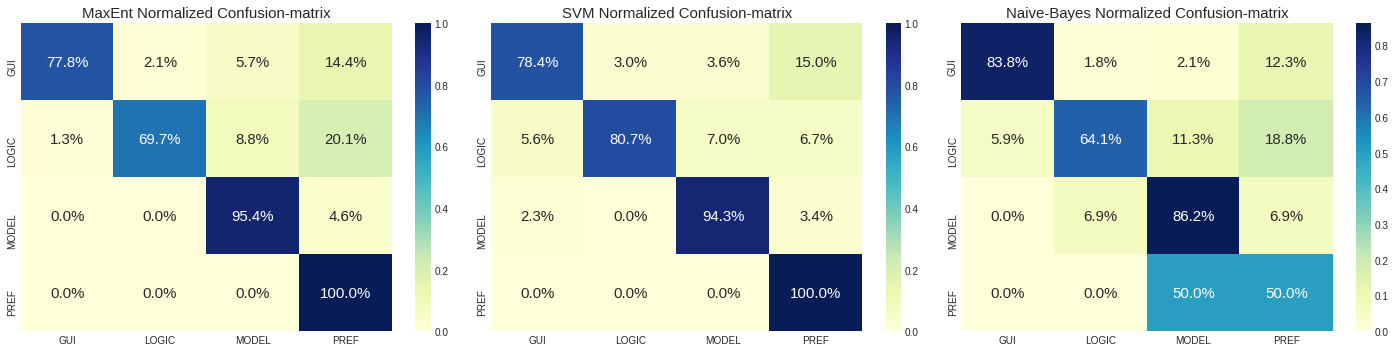

In [17]:
fig, axis = plt.subplots(1,3, figsize=(20, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

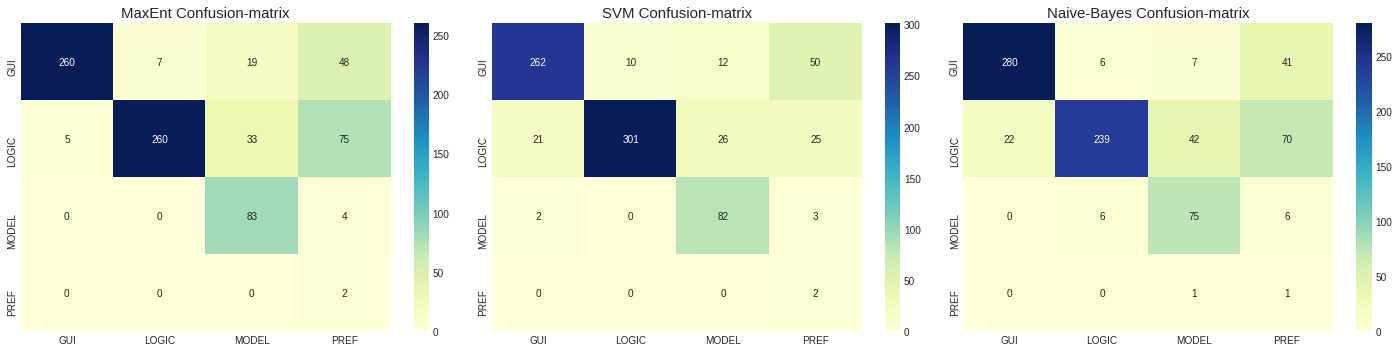

In [18]:
fig, axis = plt.subplots(1,3, figsize=(20, 5))
axis[0].set_title(metrics_max_ent.name + " Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

836


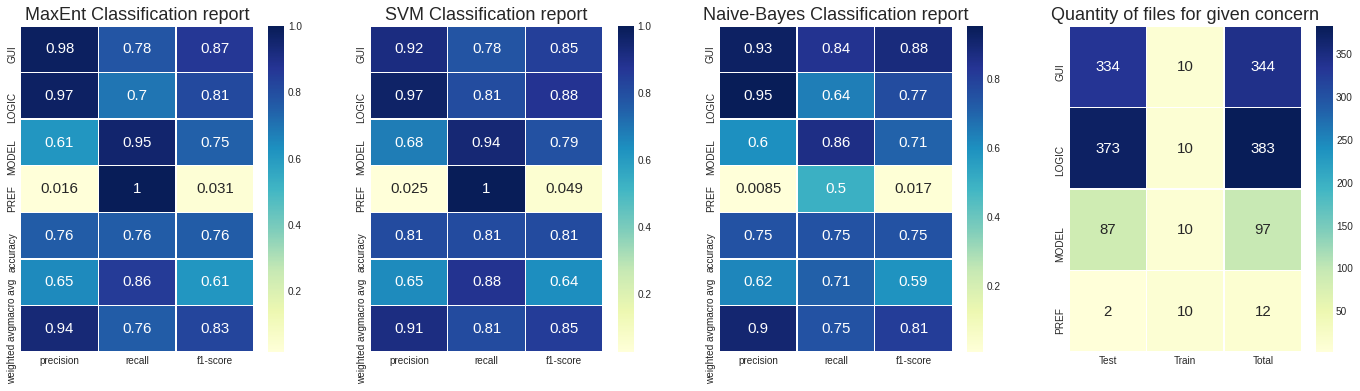

<Figure size 432x288 with 0 Axes>

In [19]:
fig, axis = plt.subplots(1,4, figsize=(24, 6))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 18)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 18)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 18)
axis[3].set_title("Quantity of files for given concern", fontsize=18)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

MAX_ENT #########################################


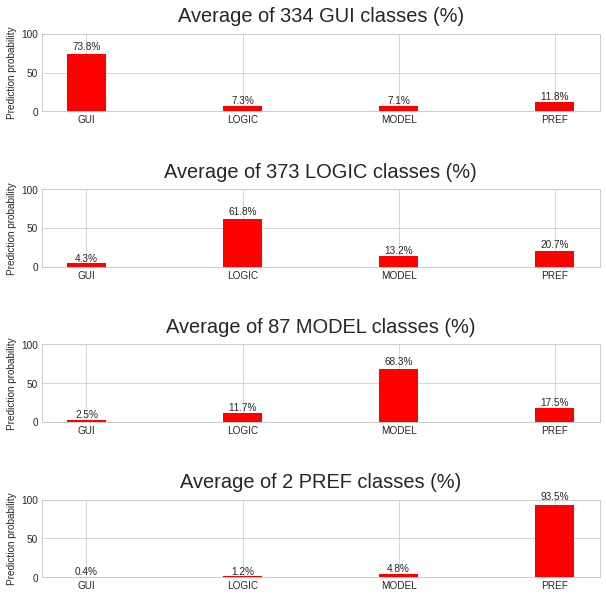

SVM #########################################


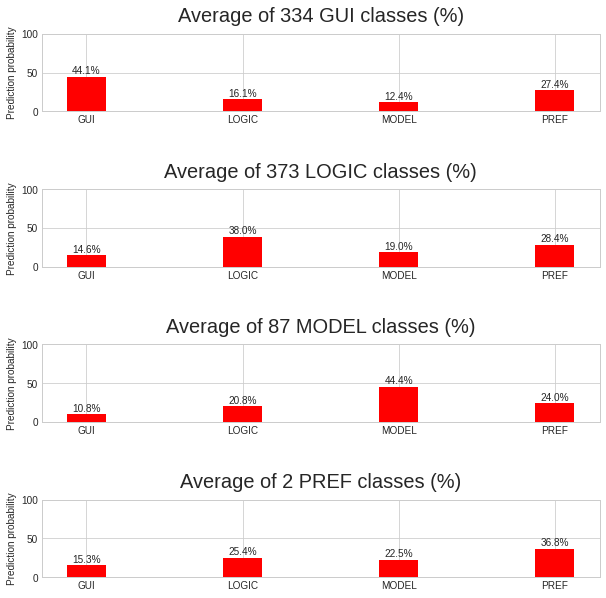

NAIVE_BAYES #########################################


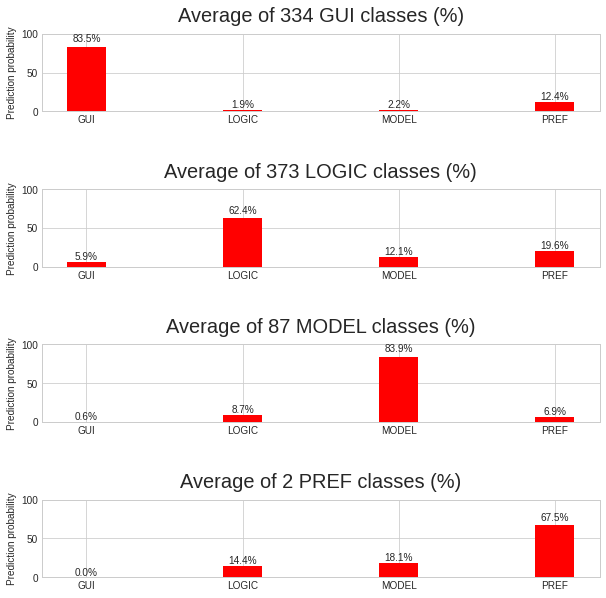

In [20]:
print('MAX_ENT #########################################')
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
print('SVM #########################################')
metrics_svm.plot_predictionScoreAverage(classifier_svm)
print('NAIVE_BAYES #########################################')
metrics_naive.plot_predictionScoreAverage(classifier_naive)

___

# TEST

In [21]:
# maxent 
s1 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac', 'tow', 'jk'],
    ]

s2 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'stem'],
    ['pac',  'tow', 'jk'],
    ['com', 'tow', 'jk', 'scw', 'lc', 'sw'],
]

# Interestting results
s3 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]

s4 = [
    ['pac', 'tow', 'jk'],
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw'],
]
s5 = [
    ['pac', 'tow', 'jk',],
    ['lib', 'tow', 'scw', 'jk', 'lc', 'stem'],
    ['c', 'tow', 'scw', 'jk', 'lc'],
    ['pm', 'tow', 'scw', 'jk', 'lc', 'sw', 'stem'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
s6 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
]
s7 = [
    ['lib', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['pac', 'tow', 'jk'],
    ['pm', 'tow', 'jk', 'scw','lc', 'sw'],
    ['pv', 'tow', 'jk', 'scw','lc', 'sw'],
    ['com', 'tow', 'jk', 'scw','lc', 'sw', 'stem'],
    ['c', 'tow', 'jk', 'scw','lc', 'sw'],
]
test_file = '../Data/test.csv'
Prep.preprocess_settings(s3, test_file)

,FileName,Label,FileContent
0,GenerateCharacterTable.java,CLI,"[util, map, util, tree, map, net, sf, jabref, ..."
1,ArgumentProcessor.java,CLI,"[io, file, io, ioexcept, nio, file, path, nio,..."
2,XMPUtilMain.java,CLI,"[io, buffer, reader, io, file, io, file, input..."
3,AuxCommandLine.java,CLI,"[net, sf, jabref, logic, auxpars, aux, parser,..."
4,ImportInspectionCommandLine.java,CLI,"[util, collect, util, collect, util, link, lis..."
...,...,...,...
840,CustomImportList.java,PREF,"[util, list, util, tree, set, net, sf, jabref,..."
841,JabRefPreferences.java,PREF,"[awt, color, awt, font, io, file, io, file, in..."
842,PreviewPreferences.java,PREF,"[util, list, net, sf, jabref, prefer, preview,..."
843,SearchPreferences.java,PREF,"[util, map, util, object, net, sf, jabref, gui..."


In [22]:
test_df = pd.read_csv(test_file)
# Remove GLOBALS and CLI from the dataset
df_sliced = Eva.filter_unwanted_labels(test_df, 'Label', ['GLOBALS', 'CLI'])
test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
confusion_list = []

# Train and gather evaluation metrics
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity, 10)
classifier_max_ent , metrics_max_ent = evaluate.evaluate_MaxEnt()
classifier_svm , metrics_svm = evaluate.evaluate_SVM()
classifier_naive, metrics_naive = evaluate.evaluate_Naive_Bayes()

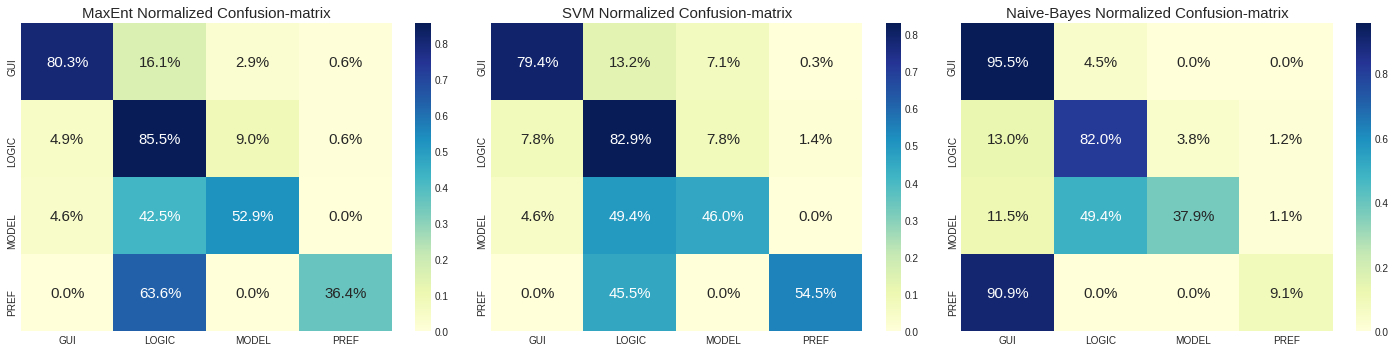

In [23]:
fig, axis = plt.subplots(1,3, figsize=(20, 5))
axis[0].set_title(metrics_max_ent.name + " Normalized Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Normalized Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Normalized Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_normalized_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_normalized_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_normalized_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

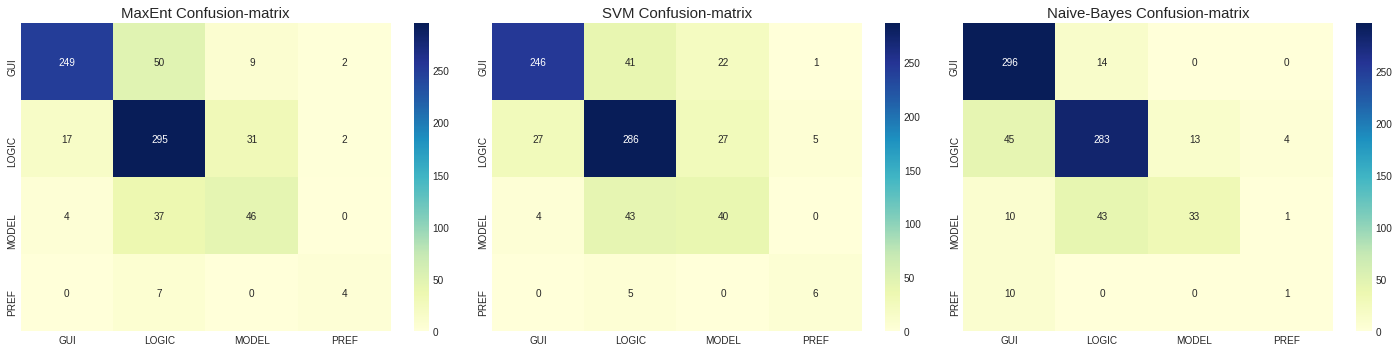

In [24]:
fig, axis = plt.subplots(1,3, figsize=(20, 5))
axis[0].set_title(metrics_max_ent.name + " Confusion-matrix",fontsize = 15)
axis[1].set_title(metrics_svm.name + " Confusion-matrix",fontsize = 15)
axis[2].set_title(metrics_naive.name + " Confusion-matrix",fontsize = 15)
fig1 = metrics_max_ent.visualize_confusion_matrix(axis[0])
fig2 = metrics_svm.visualize_confusion_matrix(axis[1])
fig3 = metrics_naive.visualize_confusion_matrix(axis[2])
plt.tight_layout()
plt.show()

836


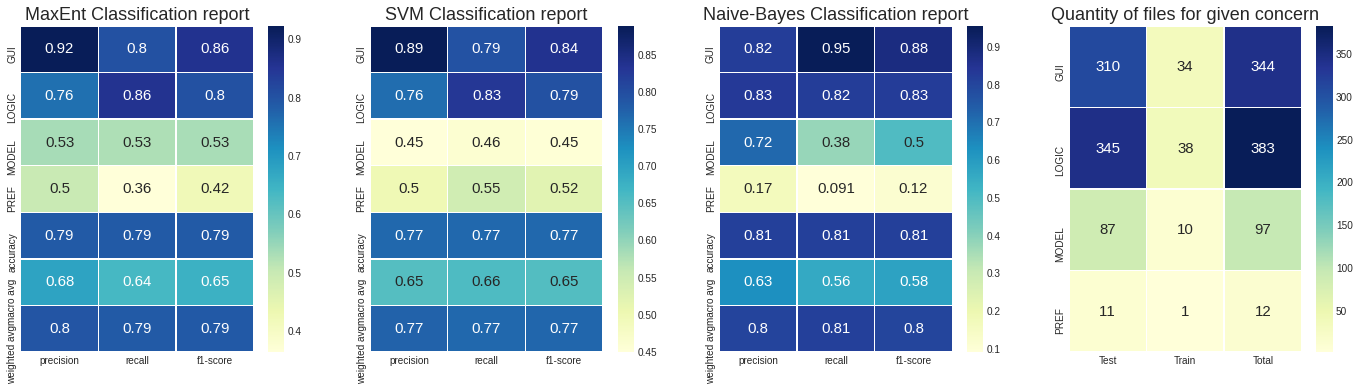

<Figure size 432x288 with 0 Axes>

In [25]:
fig, axis = plt.subplots(1,4, figsize=(24, 6))
axis[0].set_title(metrics_max_ent.name + " Classification report",fontsize = 18)
axis[1].set_title(metrics_svm.name + " Classification report",fontsize = 18)
axis[2].set_title(metrics_naive.name + " Classification report",fontsize = 18)
axis[3].set_title("Quantity of files for given concern", fontsize=18)
fig1 = metrics_max_ent.plot_data_info(axis[0])
fig2 = metrics_svm.plot_data_info(axis[1])
fig3 = metrics_naive.plot_data_info(axis[2])
metrics_naive.plot_support_table(axis[3])
plt.tight_layout()
plt.show()

MAX_ENT #########################################


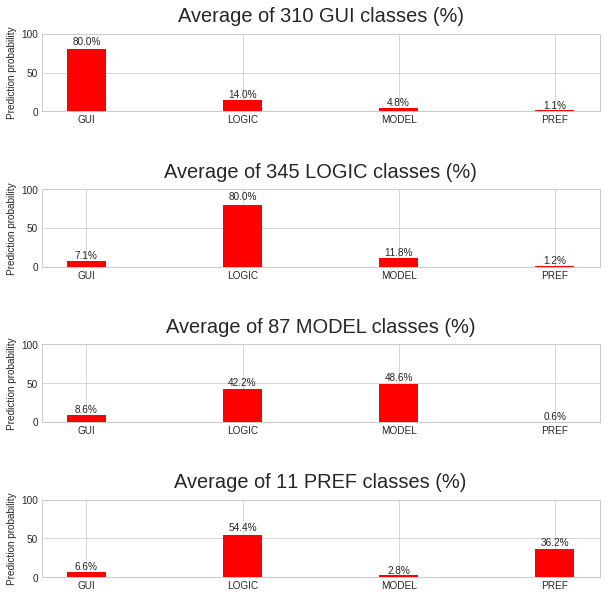

SVM #########################################


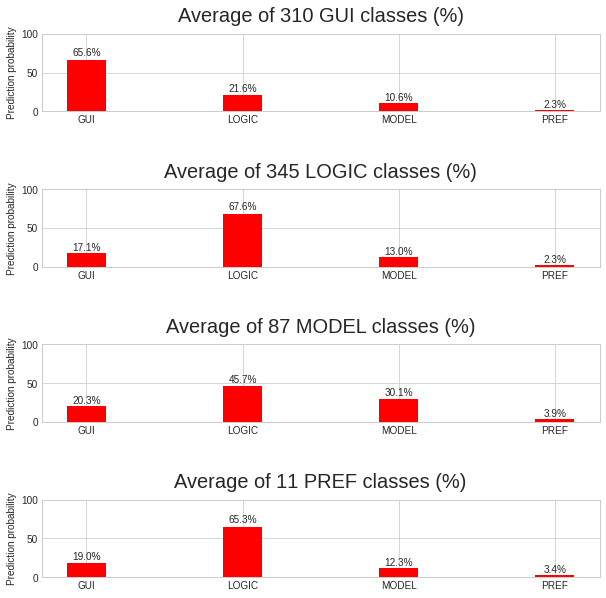

NAIVE_BAYES #########################################


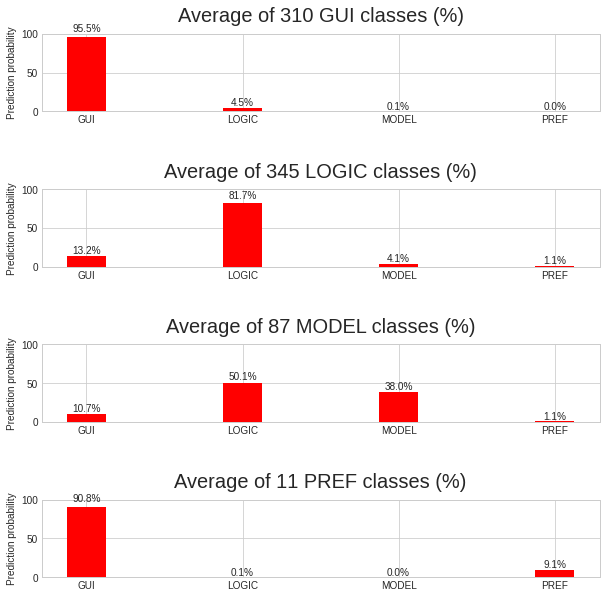

In [26]:
print('MAX_ENT #########################################')
metrics_max_ent.plot_predictionScoreAverage(classifier_max_ent)
print('SVM #########################################')
metrics_svm.plot_predictionScoreAverage(classifier_svm)
print('NAIVE_BAYES #########################################')
metrics_naive.plot_predictionScoreAverage(classifier_naive)